# Data Exploration

## Missing Data

Missing data was addressed in the following columns as follows:
1. Account bio      -> N/A
2. Location         -> N/A
3. Tweet Translated -> N/A
4. Screenshot       -> N/A
5. Rating           -> N/A
6. Remarks          -> N/A
7. Quote Tweets     -> 0

---

## One Hot Encoding

One-hot encoding allows for easier analysis of the dataset by allowing easier counting and sorting. One-hot encoding was performed on the following columns:
1. Account type
2. Content type
3. Stance on Sara


### Account type

The 'Account type' column is rewritten into the following columns:
1. Anonymous
2. Identified
3. Media


### Content type

The 'Content type' column is rewritten into the following columns:
1. Emotional
2. Rational
3. Transactional


### Stance on Sara

The 'Stance on Sara' column is rewritten into the following columns:
1. Pro-Sara
2. Anti-Sara
3. Ambiguous

---

## Date Adjustment

For the 'Date posted' column, the time is omitted to help get a better/tighter view of the particular day and month when a tweet was posted.

---

## Removal of Data Features

The 'Views' column was omitted due to sparcity of data and no clear way to assign an estimated view due to skewed view counts of tweets that do have a view count.

---

! Run the cell below to load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.preprocessing import OneHotEncoder

tweet_df = pd.read_csv('group25_data.csv', encoding='latin_1', na_filter = False)
print(tweet_df)

         ID          Timestamp  \
0      25-1  15/03/23 10:03:46   
1      25-2  15/03/23 10:58:26   
2      25-3  15/03/23 12:52:09   
3      25-4  15/03/23 12:52:12   
4      25-5  15/03/23 12:52:15   
..      ...                ...   
153  25-154  4/19/2023 4:37:00   
154  25-155  4/19/2023 4:37:02   
155  25-156  4/19/2023 4:37:03   
156  25-157  4/19/2023 4:37:06   
157  25-158  4/19/2023 4:37:07   

                                             Tweet URL Group        Collector  \
0    https://twitter.com/kyeiaaaa/status/1539408632...    25   Cunanan, Ridge   
1    https://twitter.com/itsTimheD_/status/15424700...    25   Cunanan, Ridge   
2    https://twitter.com/DIFFANG1/status/1607271052...    25   Cunanan, Ridge   
3    https://twitter.com/Mike62091243/status/152470...    25   Cunanan, Ridge   
4    https://twitter.com/Jeongyawnie/status/1524668...    25   Cunanan, Ridge   
..                                                 ...   ...              ...   
153  https://twitter.com

## Comparison of Stance on Sara Values

The following code produces a bar graph of the data for the Stance on Sara feature. Note that the feature was hot-encoded prior to graphing.

---

! Run the cell below to produce the bar graph

Ambiguous
0    48
1    93
Name: Anonymous, dtype: int64
Pro-Sara
0    137
1      4
Name: Anonymous, dtype: int64
Anti-Sara
0    97
1    44
Name: Anonymous, dtype: int64
Ambiguous
0    8
1    9
Name: Identified, dtype: int64
Pro-Sara
0    14
1     3
Name: Identified, dtype: int64
Anti-Sara
0    12
1     5
Name: Identified, dtype: int64


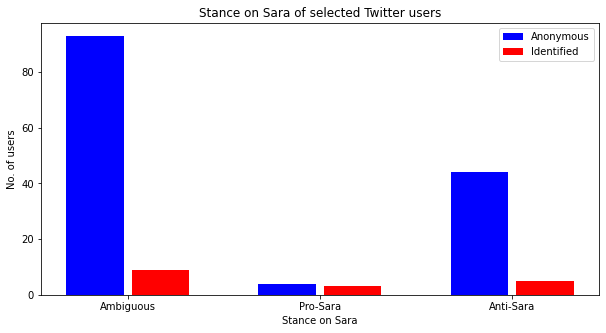

In [37]:
# Find summation of each feature to find the total number of accounts with the stance
# This is possible because the columns only have 1 or 0 thanks to one-hot encoding
ambiguous_cnt = tweet_df['Ambiguous'].sum()
pro_cnt = tweet_df['Pro-Sara'].sum()
anti_cnt = tweet_df['Anti-Sara'].sum()

stances = ['Ambiguous', 'Pro-Sara', 'Anti-Sara']
counts = [ambiguous_cnt, pro_cnt, anti_cnt]

print(tweet_df.groupby(['Ambiguous']).sum()['Anonymous'])
print(tweet_df.groupby(['Pro-Sara']).sum()['Anonymous'])
print(tweet_df.groupby(['Anti-Sara']).sum()['Anonymous'])

print(tweet_df.groupby(['Ambiguous']).sum()['Identified'])
print(tweet_df.groupby(['Pro-Sara']).sum()['Identified'])
print(tweet_df.groupby(['Anti-Sara']).sum()['Identified'])

X_axis = np.arange(len(stances))

anon_cnt = [93, 4, 44]
identified_cnt = [9, 3, 5]

fig = plt.figure(figsize = (10, 5))

plt.bar(X_axis - 0.17, anon_cnt, color='blue', width=0.3, label='Anonymous')
plt.bar(X_axis + 0.17, identified_cnt, color='red', width=0.3, label='Identified')

plt.xticks(X_axis, stances)
plt.xlabel("Stance on Sara")
plt.ylabel("No. of users")
plt.title("Stance on Sara of selected Twitter users")
plt.legend()
plt.show()

We can observe that anonymous accounts are much more common than identified ones. This is to be expected since most people don't directly share their full names on twitter. Additionally, Anti-Sara accounts were seen talking more often about this topic copared to Pro-Sara accounts. This may be because initial hateful reactions to a given headline are more common than fact checks that try to correct the error after the fact.

## Temporal Data Analysis

The following code produces a line graph of the dates when the tweets were posted.

---

! Run the code below to produce the line graph

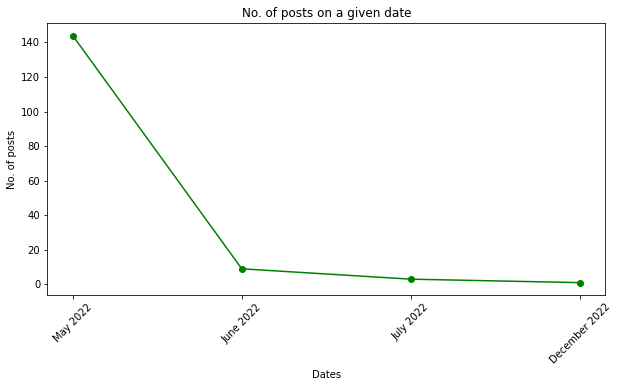

In [56]:
# Sorting function for dates
def dateSort(datesList):
    split_up = datesList.split('/')
    return split_up[2], split_up[1], split_up[0]

dates_dict = tweet_df['Date posted'].value_counts().to_dict()
dates = list(dates_dict.keys())
dates.sort(key=dateSort)

date_counts = []
# Bin dates to Month/Year (All dates are in 2022)
may = 0
june = 0
july = 0
dec = 0
binned_dates = ["May 2022", "June 2022", "July 2022", "December 2022"]

for i in tweet_df["Date posted"]:
    if i[4] == "5":
        may += 1
    elif i[4] == "6":
        june += 1
    elif i[4] == "7":
        july += 1
    else:
            dec += 1
        
binned_date_count = [may, june, july, dec]

# Produce value list that corresponds to order of the 'dates' list
#for i in dates:
#    date_counts.append(dates_dict[i])

fig = plt.figure(figsize = (10, 5))
plt.plot(binned_dates, binned_date_count, '-go')

plt.xlabel("Dates")
plt.xticks(binned_dates, binned_dates, rotation=45)
plt.ylabel("No. of posts")
plt.title("No. of posts on a given date")
plt.show()

The majority of posts came from May of 2022 which was when the fake news spread. As time went on, the interest on this particular topic died down.

## Correlation

This section checks the correlation between each variable that we classify as engagement.

In [67]:
import plotly.express as px

features = ['Likes', 'Replies', 'Retweets', 'Quote Tweets']
corr = tweet_df[features].corr()
fig = px.imshow(corr,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                labels=dict(x='Features', y='Features', color='Correlation'),
                x=corr.columns,
                y=corr.columns,
                title='Correlation of Various Engagement Features')
fig.show()

## Some Scatterplots of engagement pairs

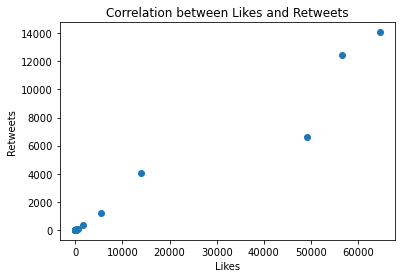

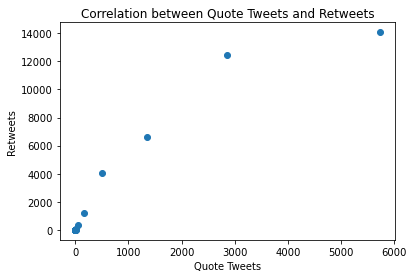

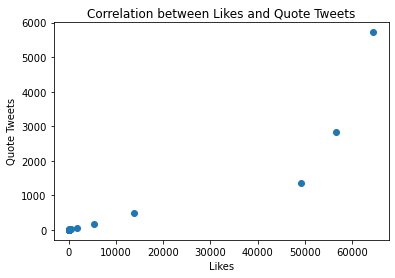

In [5]:
x = tweet_df['Likes'].tolist()
y = tweet_df['Retweets'].tolist()
plt.scatter(x, y)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Correlation between Likes and Retweets')
plt.show()

x = tweet_df['Quote Tweets'].tolist()
y = tweet_df['Retweets'].tolist()
plt.scatter(x, y)
plt.xlabel('Quote Tweets')
plt.ylabel('Retweets')
plt.title('Correlation between Quote Tweets and Retweets')
plt.show()

x = tweet_df['Likes'].tolist()
y = tweet_df['Quote Tweets'].tolist()
plt.scatter(x, y)
plt.xlabel('Likes')
plt.ylabel('Quote Tweets')
plt.title('Correlation between Likes and Quote Tweets')
plt.show()

## Distribution of Follower Z-score

Number of outliers in 'Followers' (std=1): 18
Number of outliers in 'Followers' (std=2): 9
Number of outliers in 'Followers' (std=3): 7


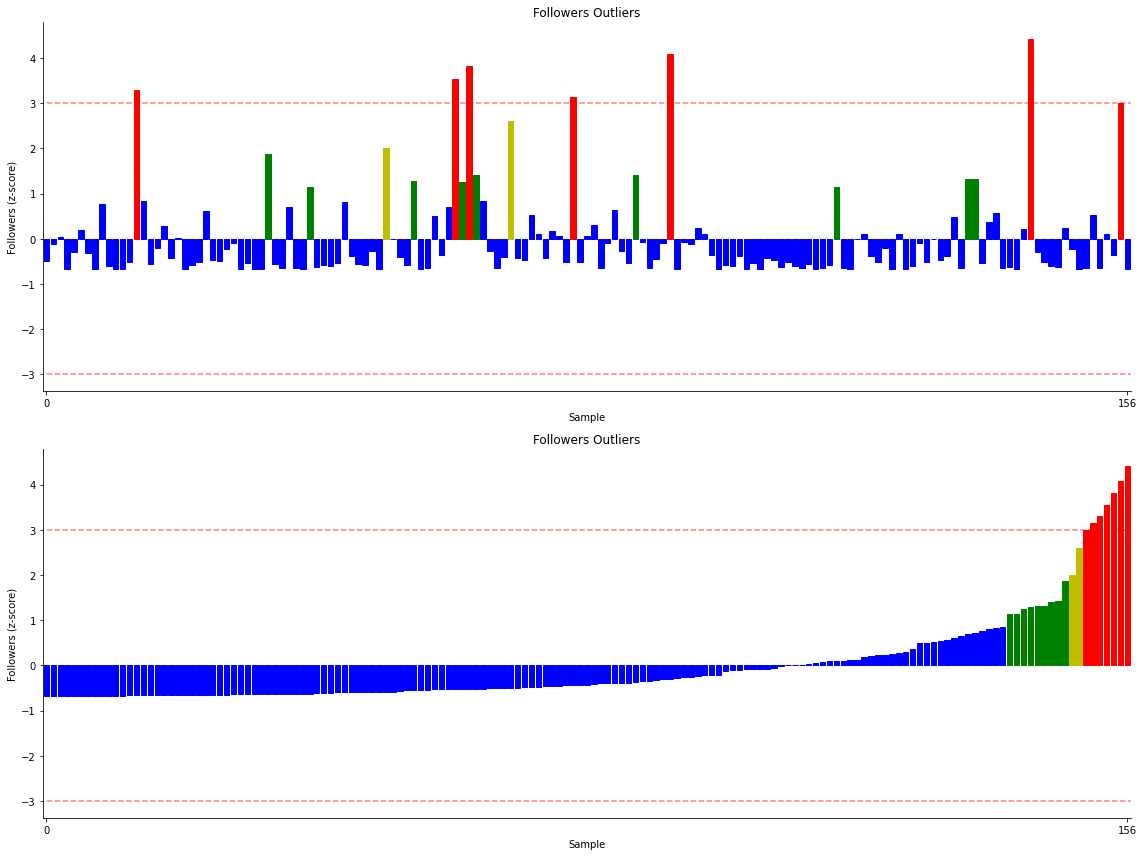

In [47]:
from sklearn.preprocessing import StandardScaler

i = tweet_df[(tweet_df.Followers == 50812)].index
tweet_df = tweet_df.drop(i)
tweet_df.reset_index(drop=True, inplace=True)

df_scaled = tweet_df.copy(deep=True)

scaler = StandardScaler()
df_scaled[['Followers']] = scaler.fit_transform(df_scaled[['Followers']])

zscore = df_scaled['Followers']

n_out1 = len(zscore[abs(zscore) > 1])
n_out2 = len(zscore[abs(zscore) > 2])
n_out3 = len(zscore[abs(zscore) > 3])
print(f"Number of outliers in 'Followers' (std=1): {n_out1}")
print(f"Number of outliers in 'Followers' (std=2): {n_out2}")
print(f"Number of outliers in 'Followers' (std=3): {n_out3}")

# Define function for coloring bars
def color_bars(ax, tweet_df):
    for i in range(len(tweet_df)):
        val = abs(tweet_df.loc[i, 'Followers'])
        if val <= 1:
            color = 'b'
        elif val <= 2:
            color = 'g'
        elif val <= 3:
            color = 'y'
        else:
            color = 'r'
        ax.get_children()[i].set_color(color)
        
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))

sns.barplot(x=df_scaled.index, y=df_scaled['Followers'], ax=ax1)
sns.despine(ax=ax1)
ax1.set(title='Followers Outliers', xlabel='Sample', ylabel='Followers (z-score)')
ax1.set_xticks([0, len(df_scaled)-1])
ax1.axhline(y=3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--') # Standard deviation lines
ax1.axhline(y=-3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--')
color_bars(ax1, df_scaled)

df_sorted = df_scaled.sort_values(['Followers']).reset_index(drop=True)
sns.barplot(x=df_sorted.index, y=df_sorted['Followers'], ax=ax2)

sns.despine(ax=ax2)
ax2.set(title='Followers Outliers', xlabel='Sample', ylabel='Followers (z-score)')
ax2.set_xticks([0, len(df_sorted)-1])
ax2.axhline(y=3, xmin=-0.5, xmax=len(df_sorted)-0.5, color='red', alpha=0.5, ls='--') # Standard deviation lines
ax2.axhline(y=-3, xmin=-0.5, xmax=len(df_sorted)-0.5, color='red', alpha=0.5, ls='--')
color_bars(ax2, df_sorted) # Color the bars

plt.tight_layout()

plt.show()

## Natural Language Processing

The following code loads the needed libraries and imports for natural language processing.

---

! Run the code below to prepare the libraries

In [9]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("omw-1.4")

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\RAC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Tokenization

The following code will tokenize all of the collected tweets and stores them in a list called 'tokenized'.

---

! Run the code below to tokenize the tweets

In [15]:
tokenized = []
for i in tweet_df['Tweet']:
    tokenized.append(word_tokenize(i.lower()))
    
print(tokenized[1])

['the', 'new', 'admin', 'wants', 'to', 'abolish', 'the', 'k-12', 'system', '.', 'imagine', 'tayong', 'mga', 'estudyante', 'na', 'naghirap', 'for', 'additional', '2', 'years', 'tas', 'may', 'balak', 'iabolish', '.', 'that', 'does', "n't", 'seem', 'fair']


## Removing Stopwords

The following code will remove any stopwords found in the tweets. However, this will not remove the stopwords if punctuation is inserted within the words. The English stopwords were obtained from the nltk library while the Tagalog and Cebuano stopwords were obtained from the following github repositories:

    Tagalog: https://github.com/stopwords-iso/stopwords-tl
    Cebuano: https://github.com/digitalheir/cebuano-dictionary-js/blob/master/stop-words/stop-words.ts 

---

! Run the code below to load the stopwords and remove them from all tweets

In [48]:
# Open all stopwords and collect them into one object
stops_en = set(stopwords.words('english'))

f = open("./stopwords/stopwords_tl.txt", "r")
stops_tl = set(f.read().split("\n"))
f.close()

f = open("./stopwords/stopwords_cb.txt", "r")
stops_cb = set(f.read().split("\n"))
f.close()

stops = stops_cb.union(stops_en, stops_tl)

# Clean all tweets
cleaned = []
for i in tokenized:
    wordsFiltered = []
    for w in i:
        if w not in stops:
            wordsFiltered.append(w)
    cleaned.append(wordsFiltered)
print(cleaned[1])

['new', 'admin', 'wants', 'abolish', 'k-12', 'system', '.', 'imagine', 'tayong', 'estudyante', 'naghirap', 'additional', '2', 'years', 'tas', 'balak', 'iabolish', '.', "n't", 'seem', 'fair']


## Lemmatization

The following code will lemmatize the cleaned tweets, changing words to their root form wherever applicable.

---

! Run the code below to lemmatize the tweets

In [49]:
# Stemming and lemmatization
wnl = WordNetLemmatizer()
lemmatized = []
for i in cleaned:
    wordsLemmatized = []
    for w in i:
        wordsLemmatized.append(wnl.lemmatize(w, pos="v"))
    lemmatized.append(wordsLemmatized)

df2 = pd.DataFrame({'Tokenized' : tokenized.copy(), 'Cleaned' : cleaned.copy(), 'Lemmatized' : lemmatized.copy()})

print(lemmatized[1])

['new', 'admin', 'want', 'abolish', 'k-12', 'system', '.', 'imagine', 'tayong', 'estudyante', 'naghirap', 'additional', '2', 'years', 'tas', 'balak', 'iabolish', '.', "n't", 'seem', 'fair']
